## Imports

In [97]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import PIL
import os
import glob
from PIL import Image as im

## Compression

In [98]:
file_name = 'test-1-compressed.jpg'
picture = Image.open('test1.jpg')
dim = picture.size
print(f"This is the current width and height of the image: {dim}")
picture.save("Compressed_"+file_name,optimize=True,quality=30) 

This is the current width and height of the image: (300, 300)


## Loading Model

In [21]:
import keras.backend as K
from tensorflow.keras.optimizers import Adam
from keras.losses import binary_crossentropy

def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    return K.mean( (2. * intersection + smooth) / (union + smooth), axis=0)

def dice_p_bce(in_gt, in_pred):
    return 0.05*binary_crossentropy(in_gt, in_pred) - dice_coef(in_gt, in_pred)

def true_positive_rate(y_true, y_pred):
    return K.sum(K.flatten(y_true)*K.flatten(K.round(y_pred)))/K.sum(y_true)

model = load_model("full_best_model.h5", compile = False)

In [22]:
model.compile(optimizer="adam", loss=dice_p_bce, metrics=[dice_coef, 'binary_accuracy', true_positive_rate])

## Take input 

In [76]:
img = image.load_img(r"vit.png",target_size = (300,300))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x.shape

(1, 300, 300, 3)

## Prediction

In [77]:
pred = model.predict(x)

In [78]:
pred

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]]], dtype=float32)

In [79]:
type(pred)

numpy.ndarray

In [81]:
int_pred = pred.astype(int)
print(int_pred)

[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]]


In [82]:
from matplotlib import pyplot as plt

In [83]:
print(np.unique(int_pred))

[0 1]


In [84]:
arr = int_pred.reshape(1, 300,300)

In [85]:
arr

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])

In [86]:
print(np.unique(arr))

[0 1]


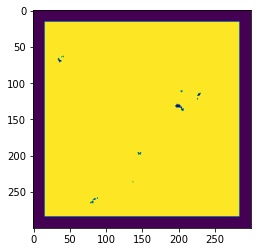

In [89]:
plt.imshow(arr[0])
plt.show()

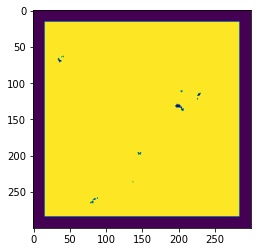

In [95]:
plt.imshow(int_pred[0])
plt.show()